<a href="https://colab.research.google.com/github/CoderFek/Data-Analysis-projects/blob/main/EDA%20on%20Goodreads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***CoderFek***

Project 3 - Goodreads EDA

Dataset available at [kaggle/dataset/goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)

## **IMPORTING LIBRARIES**

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [96]:
books = pd.read_csv('/content/Books.csv', on_bad_lines = 'skip')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

The 'publication_date' column is in the form of objects, we need to convert it into datetime in order to perform further anlysis.

## **DATA CLEANING**

In [ ]:
# Removing '/' between dates so that it can be converted into datetime easily.
books['publication_date'] = books['publication_date'].str.replace('/','')

In [ ]:
books['publication_date'] =  pd.to_datetime(books['publication_date'], format = "%m%d%Y", errors='coerce')

In [ ]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


In [ ]:
books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [ ]:
books.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
  num_pages                    int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

😃

In [ ]:
books.shape

(11123, 12)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7     num_pages         11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.0+ MB


Did you notice something?🤔 The name of column[7] seems a bit different. Let's check!

In [ ]:
len(books.columns[7])

11

Indeed, there are 2 redundant white spaces in the beginning. Let's clean it.

In [ ]:
x = "".join(books.columns[7].split())
books.rename(columns = {books.columns[7]:x}, inplace = True)

In [ ]:
len(books.columns[7])

9

👍

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.0+ MB


The data is clean now let's perform some analysis

## **DATA ANALYSIS**

In [ ]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
books['authors'].unique()

array(['J.K. Rowling/Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'C.S. Lewis/Ana Falcão Bastos',
       'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos',
       'William T. Vollmann/Larry McCaffery/Michael Hemmingson'],
      dtype=object)

In [31]:
#books that are highly rated
top_rated = books[books['average_rating'] >= 4.50]
top_rated

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006-01-01
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004-01-01
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004-01-01
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,2005-09-12,Scholastic,2005-01-01
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,2012-09-25,Ballantine Books,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,43509,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,4.56,074754624X,9780747546245,eng,636,18754,906,2000-07-08,Bloomsbury,2000-01-01
10790,44030,Looking East,Steve McCurry,4.55,0714846376,9780714846378,eng,124,83,8,2006-09-01,Phaidon Press,2006-01-01
10918,44734,Fullmetal Alchemist Vol. 6 (Fullmetal Alchemi...,"Hiromu Arakawa,Akira Watanabe",4.58,1421503190,9781421503196,eng,200,10052,201,2006-03-21,VIZ Media LLC,2006-01-01
10937,44826,The Price of the Ticket: Collected Nonfiction ...,James Baldwin,4.70,0312643063,9780312643065,eng,712,404,30,1985-09-15,St. Martin's Press,1985-01-01


In [32]:
#top_rated book of stephen king
top_rated[top_rated['authors'] == 'Stephen King']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
1575,5417,Carrie / 'Salem's Lot / The Shining,Stephen King,4.54,0517219026,9780517219027,eng,1096,13137,61,2002-07-02,Wings,2002-01-01


This is not a single book but a series of three novels written by 'Stephen King' and published by 'Wings'.

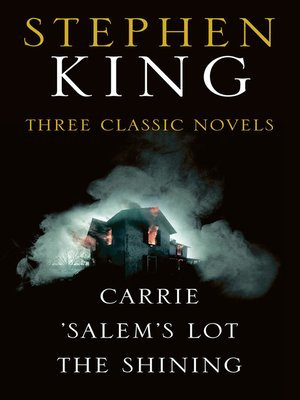

There is a critical error within 'authors' column. Notice that multiple authors on a book are seperated by '/' instead of ' , '. This may lead to problems in the future. Let's fix this!

In [ ]:
books['authors'] = books['authors'].str.replace('/',',')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


It is recommended(in this case) to do this before coverting to datetime, in that case we can directly use

```
books = books.stack().str.replace('/',',').unstack()
```
**Only applicable when all the data types in the dataframe are string/object**


Done✅

In [33]:
#top_rated books where one of the author is J.K. Rowling
top_rated[top_rated["authors"].str.contains('J.K. Rowling')]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006-01-01
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004-01-01
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004-01-01
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,2005-09-12,Scholastic,2005-01-01
615,2005,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0747584664,9780747584667,eng,768,1213,78,2006-06-23,Bloomsbury Publishing,2006-01-01
1233,4256,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,074757362X,9780747573623,eng,480,3141,140,2008-07-01,Bloomsbury UK,2008-01-01
1720,5991,混血王子的背叛 (哈利波特 #6),"J.K. Rowling,J.K.羅琳,皇冠編譯組,張定綺,彭倩文,趙丕慧,林靜華",4.57,9573321742,9789573321743,zho,735,75,0,2005-10-01,皇冠文化出版有限公司,2005-01-01
1721,6003,火盃的考驗 (哈利波特 #4),"J.K. Rowling,J.K.羅琳,彭倩文",4.56,9573318318,9789573318316,zho,768,91,2,2001-12-08,皇冠文化出版有限公司,2001-01-01
4411,15872,Harry Potter y el misterio del príncipe (Harry...,"J.K. Rowling,Gemma Rovira Ortega",4.57,8478889930,9788478889938,spa,602,5104,386,2006-02-28,Salamandra,2006-01-01
10344,41908,Harry Potter und der Gefangene von Askaban (Ha...,"J.K. Rowling,Rufus Beck",4.56,3895849618,9783895849619,ger,13,313,8,2002-08-31,Dhv der Hörverlag,2002-01-01


In [ ]:
top_rated[top_rated["authors"].str.contains('Stephen King')]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1575,5417,Carrie / 'Salem's Lot / The Shining,Stephen King,4.54,0517219026,9780517219027,eng,1096,13137,61,2002-07-02,Wings
9862,39661,The Shawshank Redemption: The Shooting Script,Frank Darabont/Stephen King,4.64,1557042462,9781557042460,eng,184,2406,29,2004-09-30,Newmarket Press


Let's create a new column for year of publictaion.

In [63]:
books['publication_year'] = pd.to_datetime(books['publication_date']).dt.strftime('%Y')

In [66]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004


In [67]:
books.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
publication_year              object
dtype: object

Now, we can visualise and understand the clean dataset in a better way.

## **DATA VISUALISATION**

<Axes: xlabel='average_rating', ylabel='Density'>

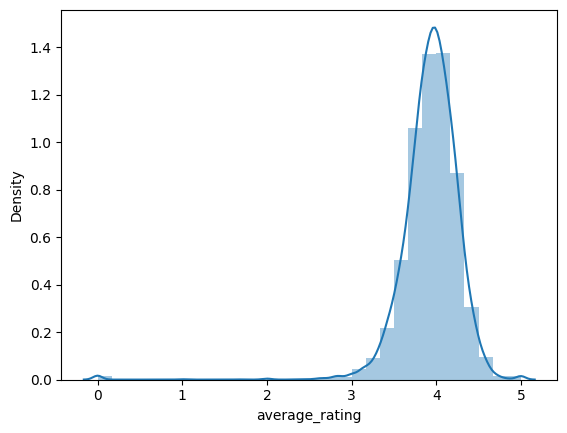

In [77]:
sns.distplot(books['average_rating'], bins=30)

Majority of the ratings are in between 3.5 to 4.5 approximately.
Very less number of books having 5 rating count.

<Axes: xlabel='num_pages', ylabel='Density'>

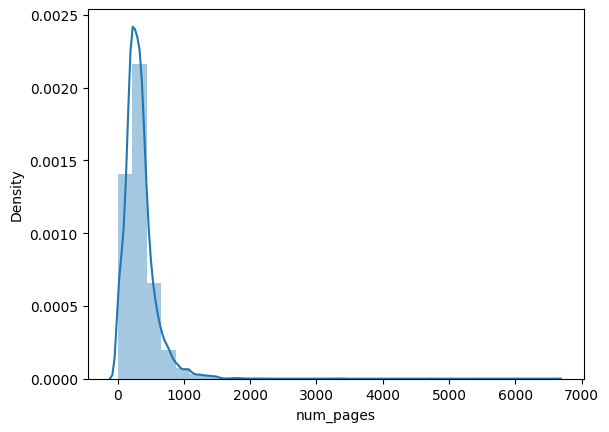

In [76]:
sns.distplot(books['num_pages'],bins = 30)

Majority of books are under 1000 page numbers.
Also, we saw using .info( ) that highest page count is in 6000-7000 range.

<Axes: xlabel='language_code'>

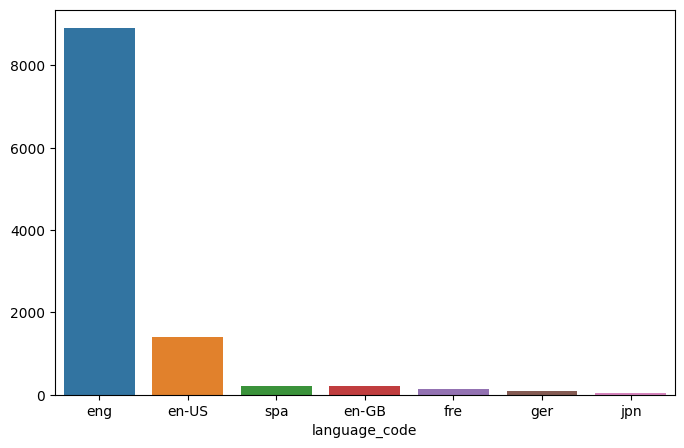

In [79]:
plt.figure(figsize = (8,5))
language_code = books.value_counts('language_code').sort_values(ascending=False)
sns.barplot(x = language_code.index[:7],y = language_code[:7])

From above graph, we can infer that, majority of the books are in english language, with some further categorised into en-US, spa, en-GB, fre

<Axes: ylabel='publisher'>

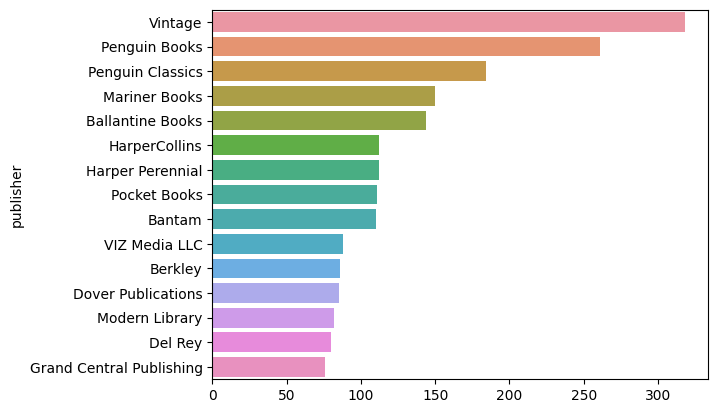

In [81]:
# Top 15 Publisher
publisher = books.value_counts('publisher').sort_values(ascending=False).head(15)
sns.barplot(y=publisher.index,x = publisher)

The above plot that Vintage has the most number of books(300+) in the list. We already observed this in the beginning when we were exploring the dataset.

Text(0, 0.5, 'Books')

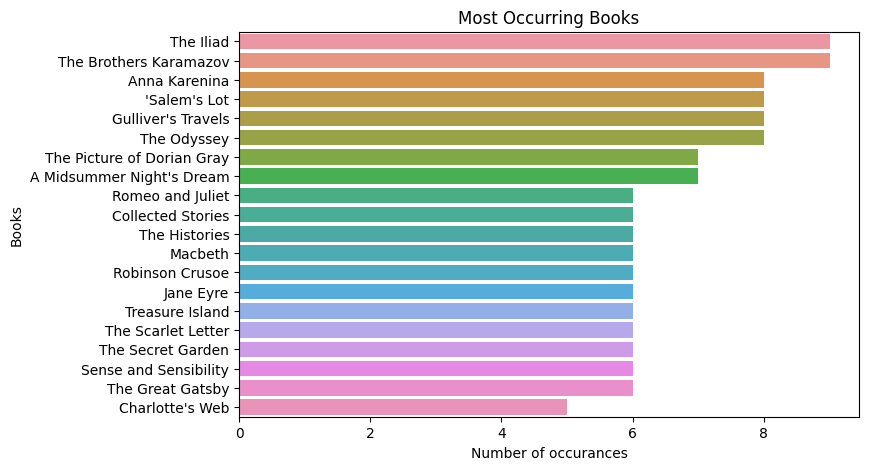

In [82]:
#Most occuring books

plt.figure(figsize = (8,5))
title = books.value_counts('title').sort_values(ascending=False).head(20)
sns.barplot(y=title.index,x=title)
plt.title('Most Occurring Books')
plt.xlabel("Number of occurances")
plt.ylabel('Books')

We can see that The lliad and The Brothers Karamazov have the most number of oocurance. 😯

<Axes: xlabel='num_pages', ylabel='title'>

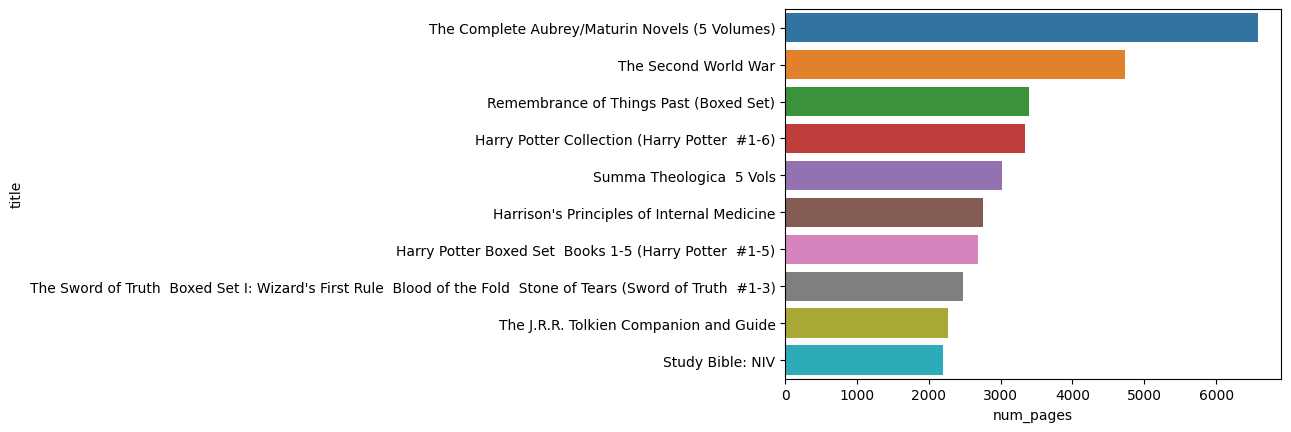

In [83]:
# Top 10 highest page count books

x = books.loc[:,['title', 'num_pages']].sort_values(by=['num_pages'],ascending = False).head(10)
sns.barplot(y = 'title',x='num_pages',data = x)

From above plot, we can infer that,

1. Book title The Complete Aubrey/Maturin Novels (5 Volumes) is having 6000+ as highest number of pages.

2. The second World War is the second highest with approx 4500 number of pages.

<Axes: xlabel='text_reviews_count', ylabel='title'>

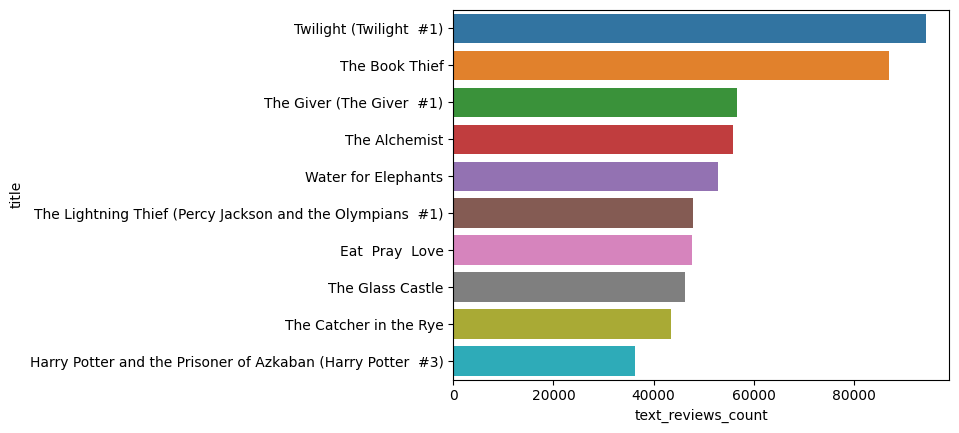

In [84]:
# Highest text review count books

x = books.loc[:,['title', 'text_reviews_count']].sort_values(by=['text_reviews_count'],ascending = False).head(10)
sns.barplot(y = 'title',x='text_reviews_count',data = x)

From above plot, we can infer that,

1. Book name Twilight (Twilight #1) is having (near 90,000+)highest number of reviews for text.

2. The Book Thief book title is second highest with around 85000 count.

## **BIVARIATE ANALYSIS**

<Axes: xlabel='average_rating', ylabel='text_reviews_count'>

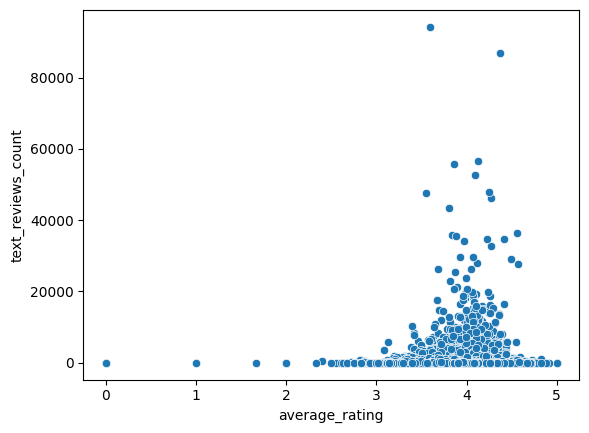

In [85]:
sns.scatterplot(y='text_reviews_count',x='average_rating',data=books)

<Axes: xlabel='average_rating', ylabel='num_pages'>

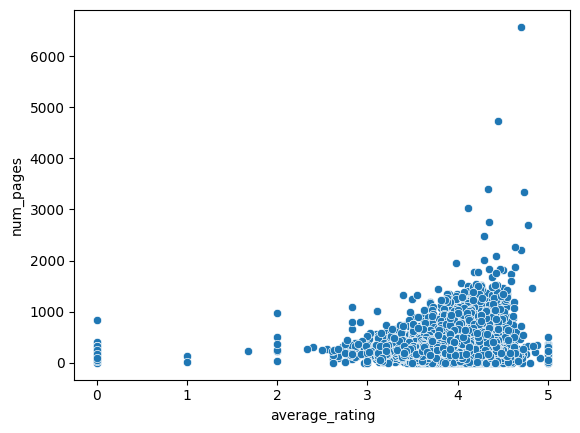

In [88]:
sns.scatterplot(y='num_pages',x='average_rating',data=books)

<Axes: xlabel='average_rating', ylabel='ratings_count'>

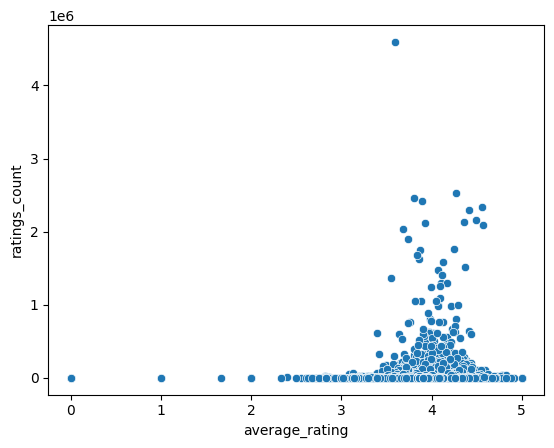

In [89]:
sns.scatterplot(y='ratings_count',x='average_rating',data=books)

We see that there is strong correlation between ratings_count and text_reviews_count.

<Axes: xlabel='ratings_count', ylabel='text_reviews_count'>

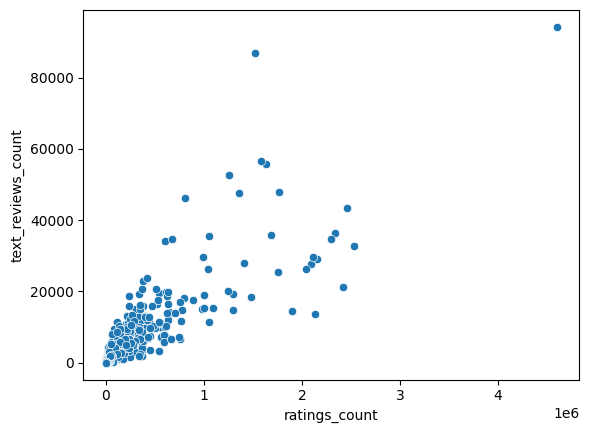

In [90]:
sns.scatterplot(x='ratings_count',y='text_reviews_count',data=books)

In [91]:
# Top 10 authors by their book count

x = books.groupby('authors')['title'].count().reset_index().sort_values('title',ascending = False).head(10)

In [92]:
# New dataframe

newdf = books[books['authors'].isin(x['authors'])]

<Axes: xlabel='authors', ylabel='average_rating'>

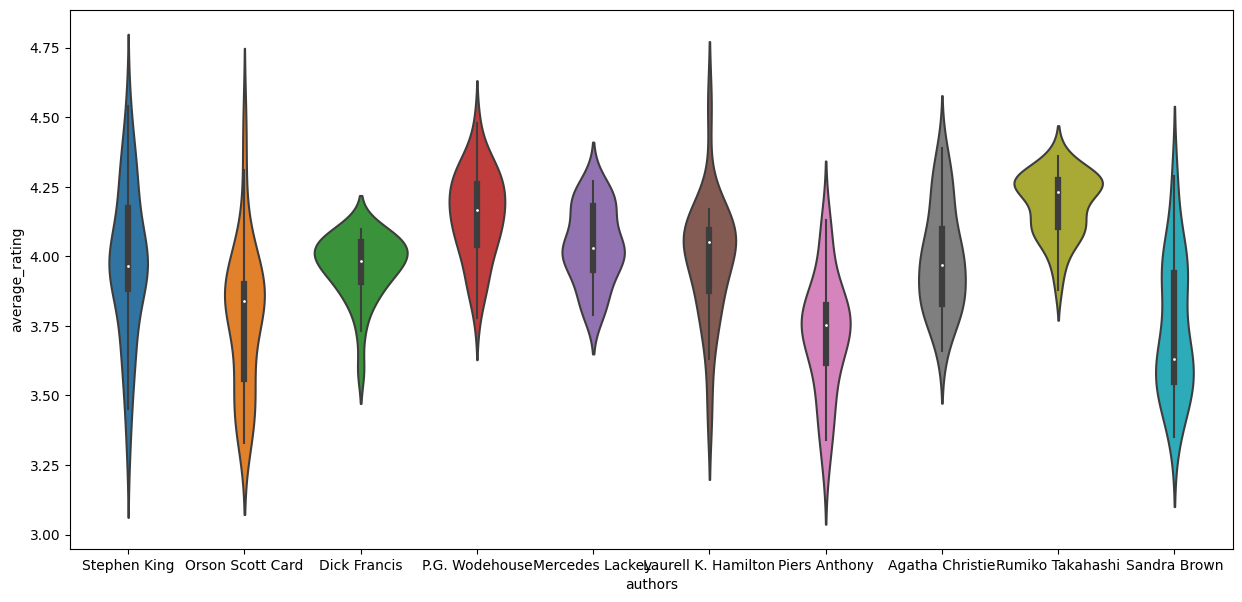

In [93]:
plt.figure(figsize = (15,7))
sns.violinplot(x='authors',y='average_rating',data=newdf)

In [98]:
months=[]
days=[]
year=[]
for i in books['publication_date']:
    year.append(i.split('/')[2])
    months.append(i.split('/')[0])

books['year'] = year
books['month'] = months

<Axes: xlabel='year'>

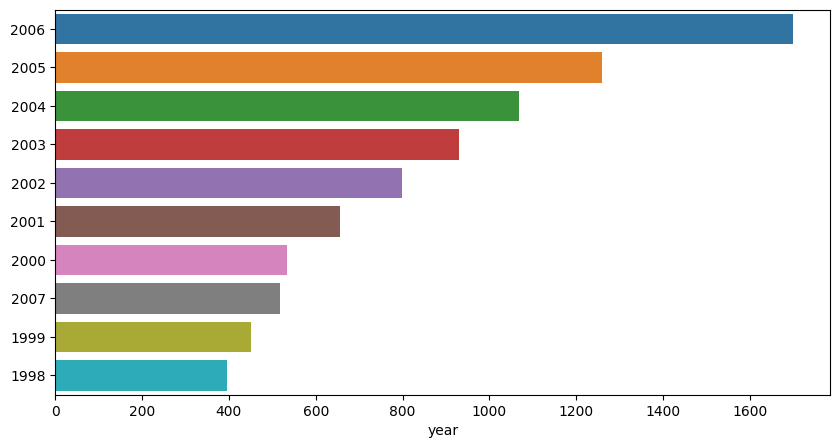

In [99]:
# In which year, highest books published.?

plt.figure(figsize = (10,5))
year = books['year'].value_counts().head(10)
year
sns.barplot(y=year.index,x=year)

<Axes: xlabel='month'>

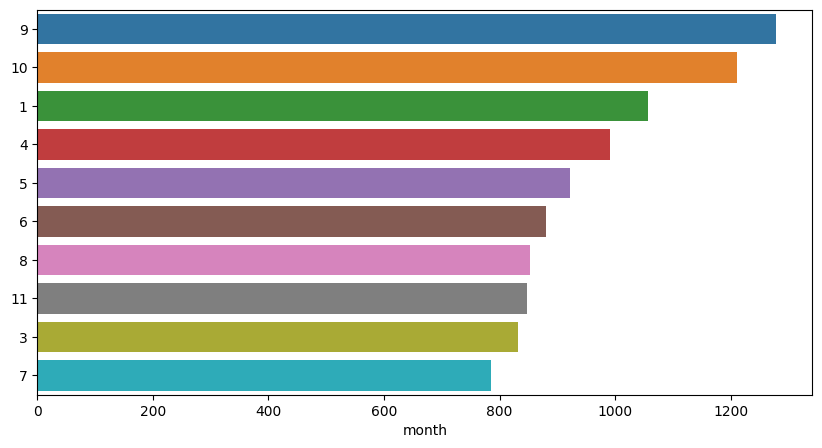

In [101]:
# In which month, highest number of books published.?

plt.figure(figsize = (10,5))
month = books['month'].value_counts().head(10)

sns.barplot(y=month.index,x=month)